In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, f1_score

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r'C:\Users\Ahmed\Downloads\Compressed\diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.duplicated().sum()

0

# Analysis

In [6]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

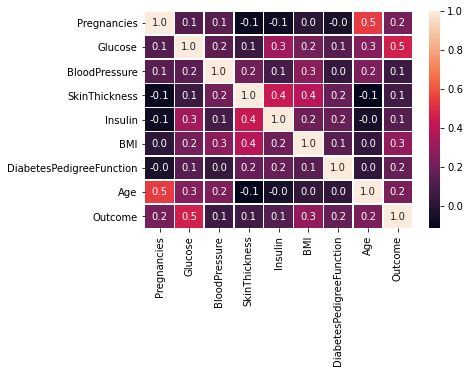

In [7]:
sns.heatmap(data.corr(),annot=True,linewidth=.5,fmt='0.1f')

<AxesSubplot:xlabel='Outcome', ylabel='count'>

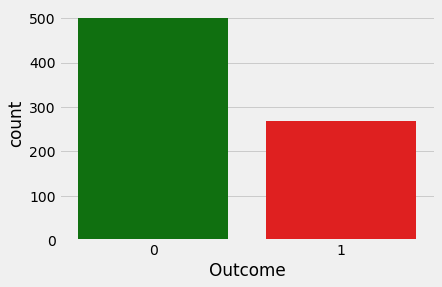

In [137]:
sns.countplot(x='Outcome',data=data,palette=['g','r'])



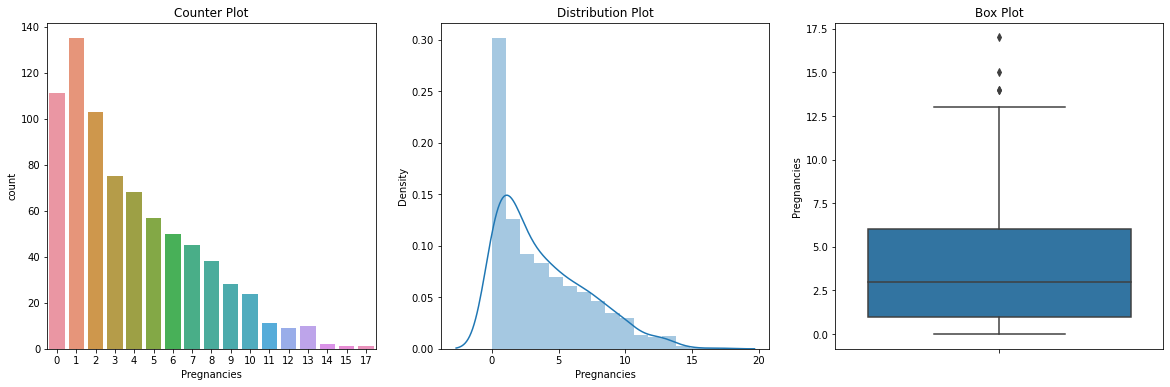

In [9]:
# Pregnancies
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title("Counter Plot")
sns.countplot(x = 'Pregnancies',data = data)

plt.subplot(1,3,2)
plt.title('Distribution Plot')
sns.distplot(data["Pregnancies"])

plt.subplot(1,3,3)
plt.title('Box Plot')
sns.boxplot(y=data["Pregnancies"])

plt.show()

<AxesSubplot:xlabel='Age'>

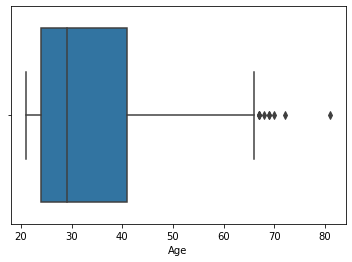

In [10]:
sns.boxplot(data.Age)

# Create Model

In [11]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']   


In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=41)

In [64]:
#scaler = MinMaxScaler()
#scaler.fit(x_train)
#X_train_scaled = scaler.transform(x_train)
#X_test_scaled = scaler.transform(x_test)

In [88]:
model1=LogisticRegression()
model2=SVC()
model3=RandomForestClassifier()
model4=GradientBoostingClassifier(n_estimators=1000)

In [99]:
col=['LogisticRegression','SVC','RandomForestClassifier','GradientBoostingClassifier']
result1=[]
result2=[]
result3=[]

LogisticRegression()
accuracy is : 0.7792207792207793 recall is : 0.7692307692307693 fi_score is : 0.6382978723404256


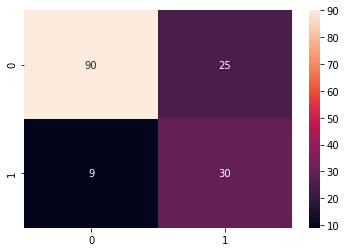

In [100]:
def calc(model):    
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    accuracy=accuracy_score(y_test,pre)
    recal=recall_score(pre,y_test)
    fi_score=f1_score(pre,y_test)
    confusion=confusion_matrix(pre,y_test)
    result1.append(accuracy)
    result2.append(recal)
    result3.append(fi_score)
    print(model)
    print('accuracy is :',accuracy,'recall is :',recal, 'fi_score is :',fi_score)
    sns.heatmap(confusion,annot=True)
    model.score(x_train_scaler,y_train)
calc(model1)

SVC()
accuracy is : 0.7597402597402597 recall is : 0.7368421052631579 fi_score is : 0.6021505376344085


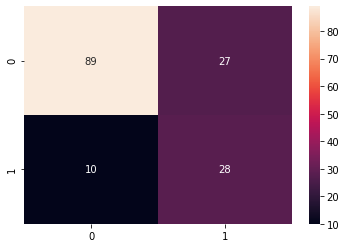

In [101]:
calc(model2)

RandomForestClassifier()
accuracy is : 0.7922077922077922 recall is : 0.7674418604651163 fi_score is : 0.673469387755102


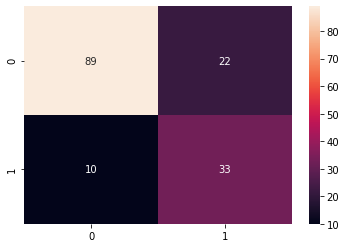

In [102]:
calc(model3)

GradientBoostingClassifier(n_estimators=1000)
accuracy is : 0.7597402597402597 recall is : 0.6666666666666666 fi_score is : 0.6605504587155963


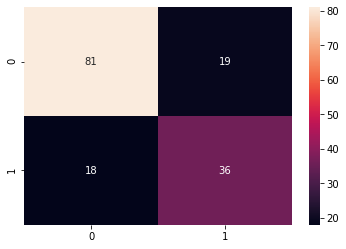

In [103]:
calc(model4)

In [122]:
final_result=pd.DataFrame({'Algorisms':col , 'Accuracies':result1,'Recal':result2,'F1_Score':result3})

In [123]:
final_result

,Algorisms,Accuracies,Recal,F1_Score
0,LogisticRegression,0.779221,0.769231,0.638298
1,SVC,0.759740,0.736842,0.602151
2,RandomForestClassifier,0.792208,0.767442,0.673469
3,GradientBoostingClassifier,0.759740,0.666667,0.660550


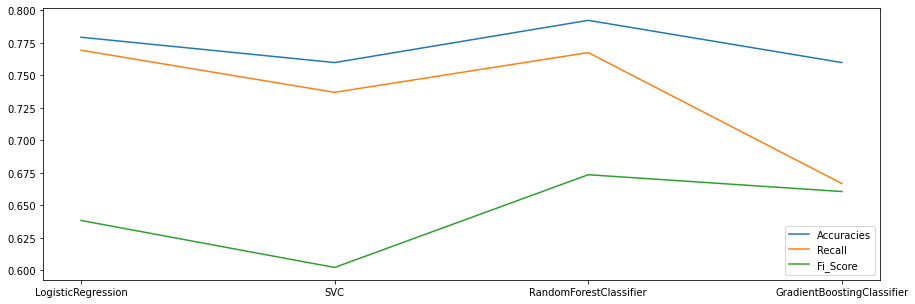

In [132]:
fig,ax=plt.subplots(figsize=(15,5))
plt.plot(final_result.Algorisms,result1, label='Accuracies')
plt.plot(final_result.Algorisms,result2 , label='Recall')
plt.plot(final_result.Algorisms,result3 , label='Fi_Score')
plt.legend()
plt.show()